# Ecommerce - EDA 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

## Getting the Data


In [3]:
customers = pd.read_csv('Ecommerce.csv')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [6]:
customers.shape

(500, 8)

### Checking missing values & Duplicates

In [7]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [8]:
customers.duplicated().sum()

0

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Statistical Summary

In [10]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

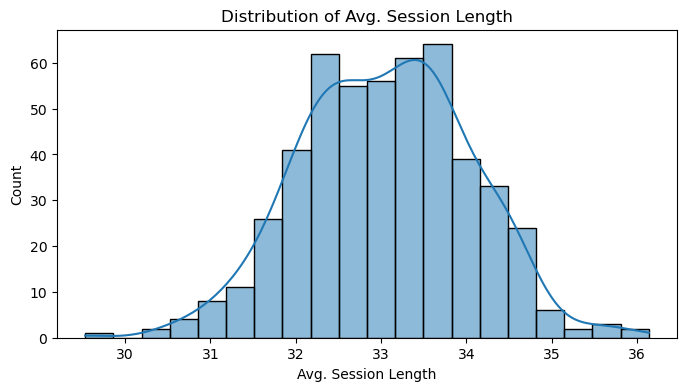

In [11]:
#Distribution of columns

plt.figure(figsize=(8,4))
sns.histplot(customers['Avg. Session Length'],kde= True)
plt.title('Distribution of Avg. Session Length')
plt.show()

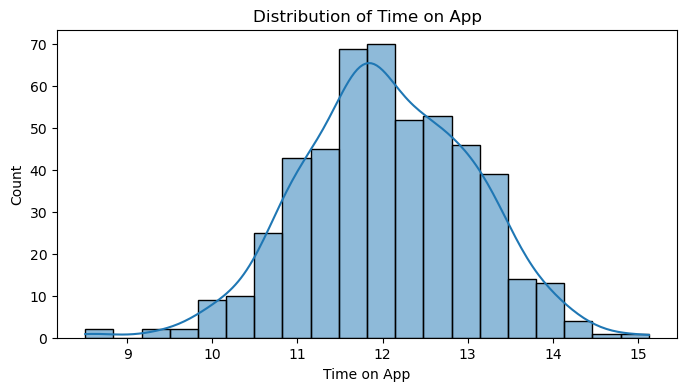

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(customers['Time on App'],kde= True)
plt.title('Distribution of Time on App')
plt.show()

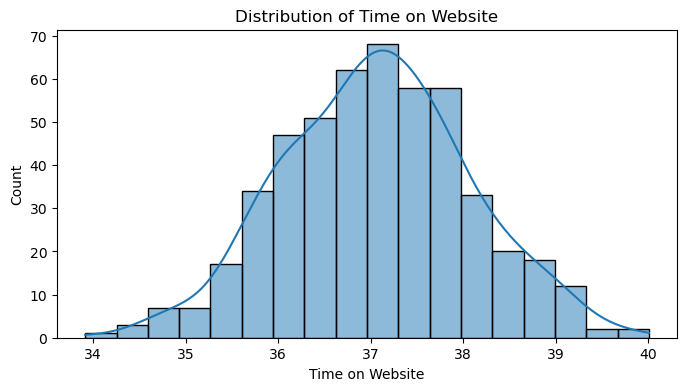

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(customers['Time on Website'],kde= True)
plt.title('Distribution of Time on Website')
plt.show()

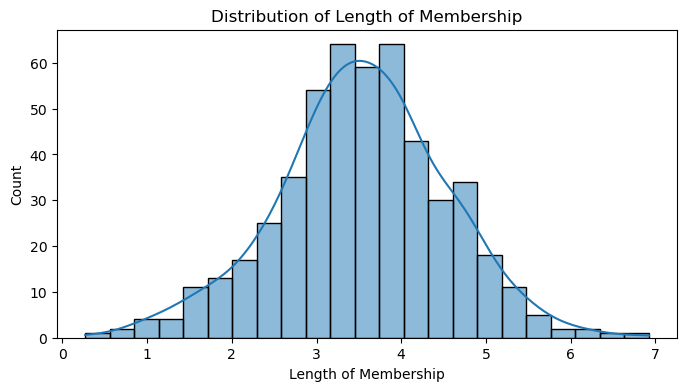

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(customers['Length of Membership'],kde= True)
plt.title('Distribution of Length of Membership')
plt.show()

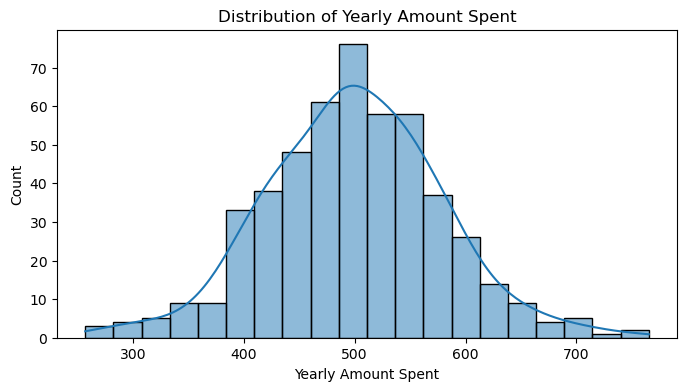

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(customers['Yearly Amount Spent'],kde= True)
plt.title('Distribution of Yearly Amount Spent')
plt.show()

### How are the client's time spent on each platform related to the amount that they spend per year?

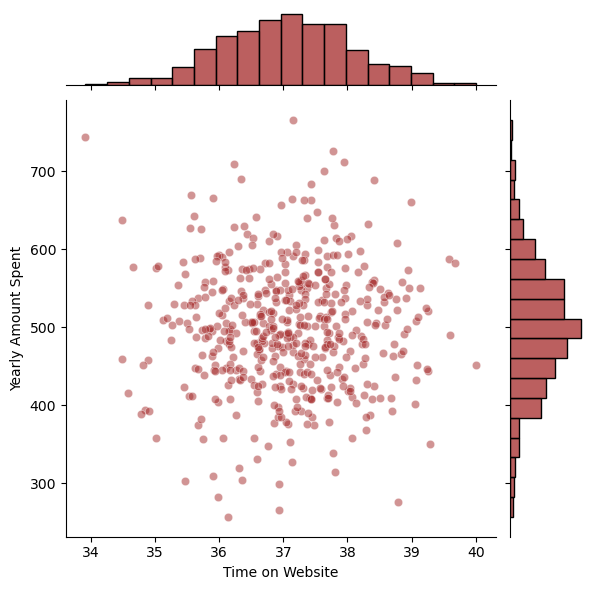

In [16]:
# time on website vs yearly amount spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, alpha=0.5,color = 'brown')

* There doesn't seem to be much correlation between the time on the desktop website with the amount that clients spend per year.

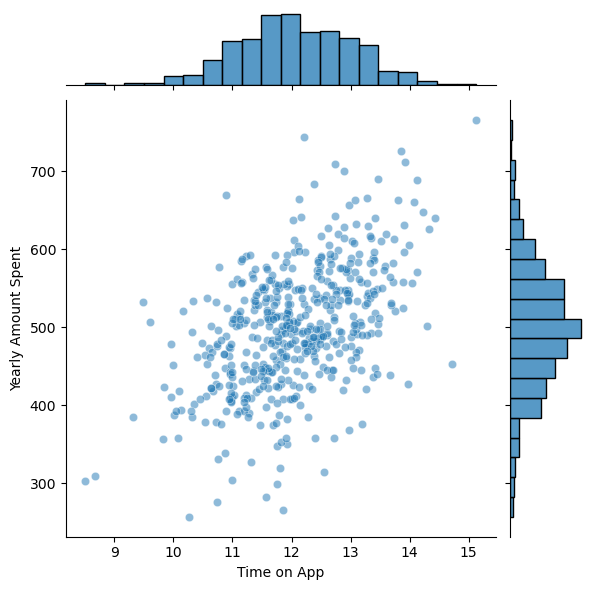

In [17]:
# time on app vs yearly amount spent
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, alpha=0.5)

* This graph shows that there seems to be a small correlation between the time spent on the app and the yearly spending. This is probably because these clients tend to spend less time browsing on the phone. Maybe the payment process is faster on the app or the calls-to-action are more successful there.

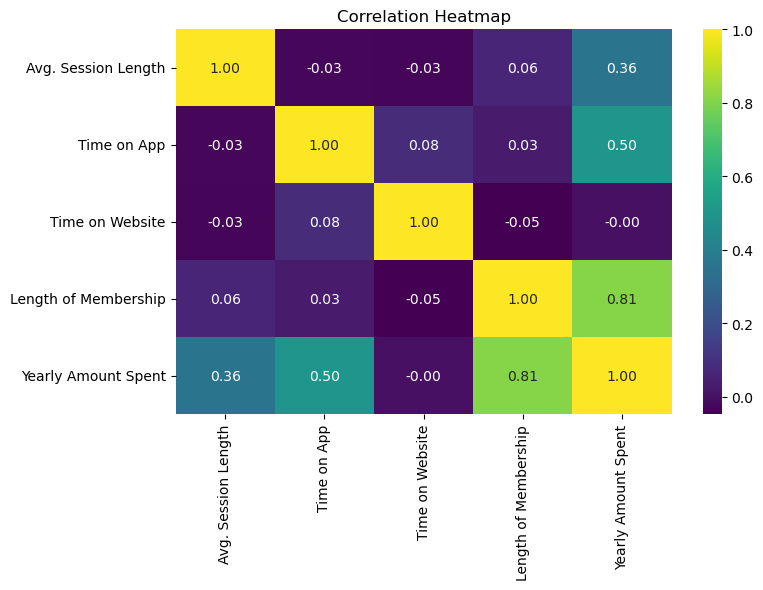

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = customers.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()

* 1. There is strong linear positive correlation between Yearly Amount Spent and Length of Membership
* 2. There is weak linear positive correlation between Yearly Amount Spent and Avg Session Length
* 3. There is no correlation between Yearly Amount Spent and Time on Website

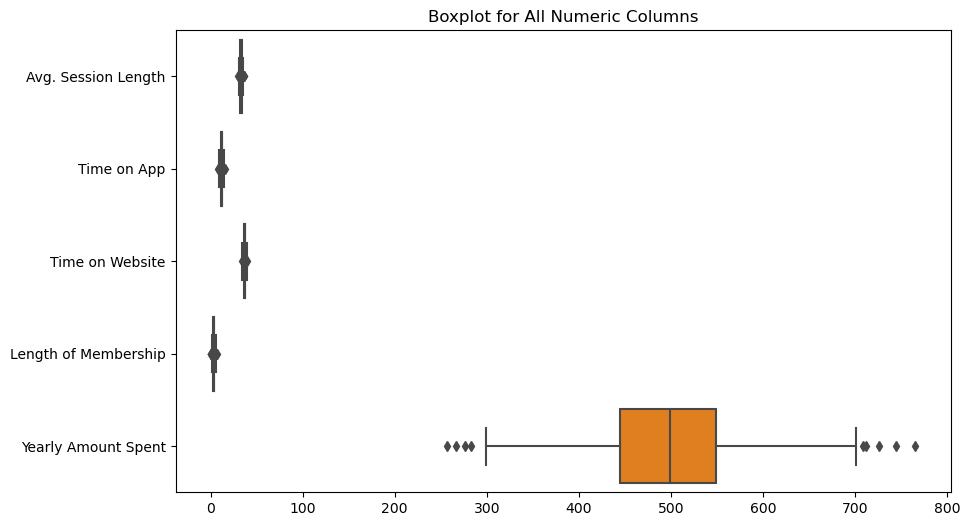

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers, orient="h", palette="Set1")

plt.title('Boxplot for All Numeric Columns')
plt.show()

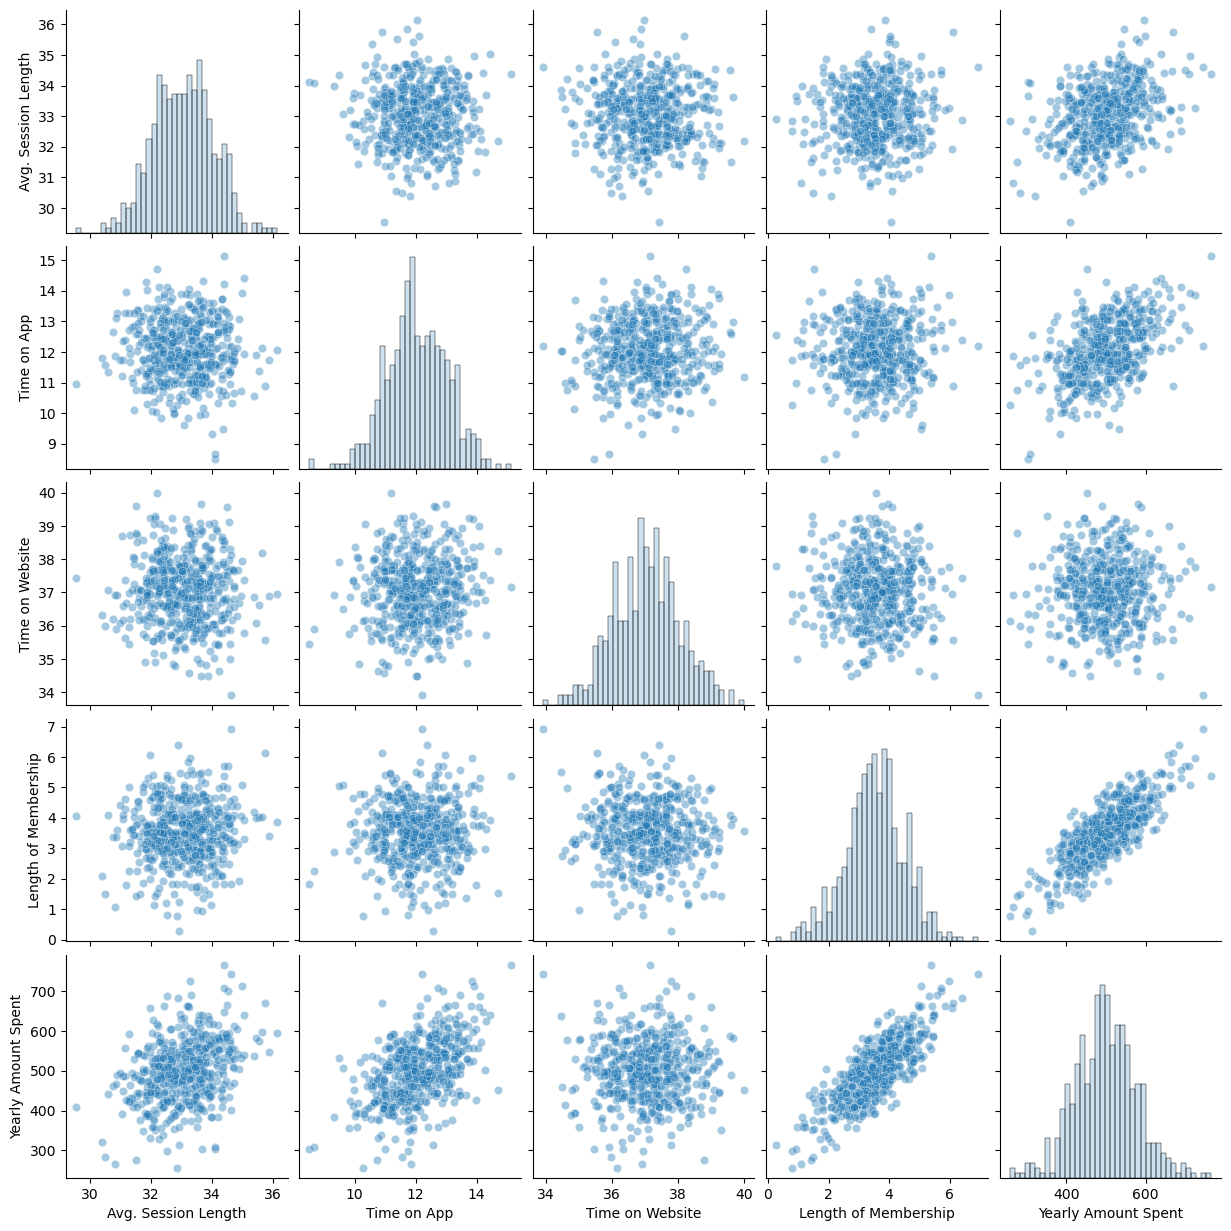

In [24]:
import seaborn as sns

# Custom palette
sns.pairplot(customers, 
             kind='scatter', 
             plot_kws={'alpha': 0.4}, 
             diag_kws={'alpha': 0.22, 'bins': 40})

* After analysing the pairplot, we see that there does seem to be one big positive correlation between two variables: the length of membership and the yearly expenditure. In the end we recrate this plot to visualise the regression line.

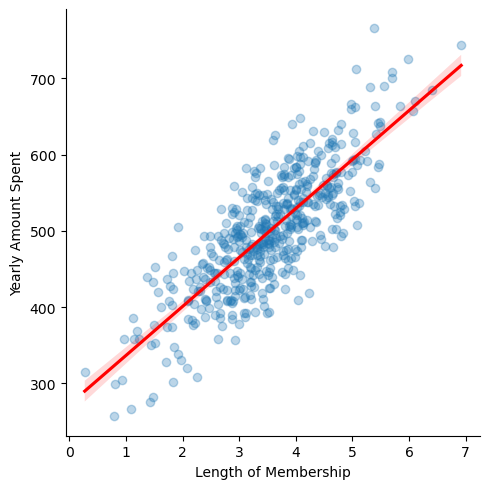

In [22]:
# length of membership vs yearly amount spent
sns.lmplot(
    x='Length of Membership', 
    y='Yearly Amount Spent', 
    data=customers,
    scatter_kws={'alpha': 0.3},  # Change 'blue' to your desired color for scatter
    line_kws={'color': 'red'}  # Change 'red' to your desired color for the regression line
)

plt.show()
